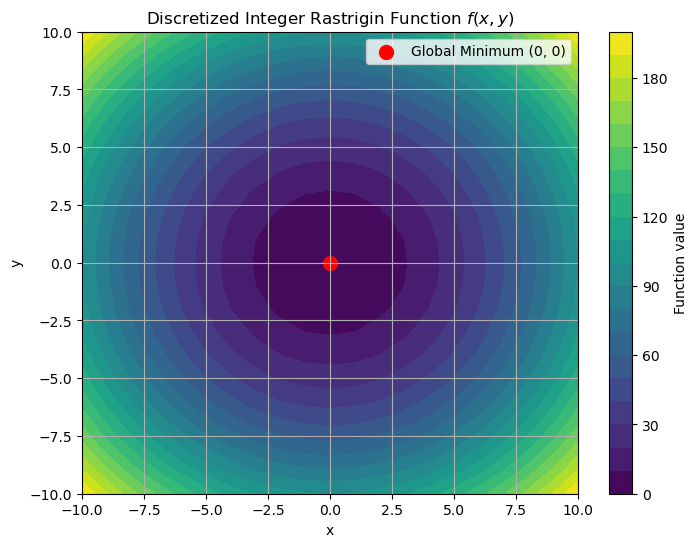

In [415]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from collections import Counter

# Define the Rastrigin function
def rastrigin(x, y, A=10):
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# Define the grid range as integers
# Limits the search space to these values
x_vals = np.arange(-10, 11, 1)
y_vals = np.arange(-10, 11, 1)  

# Create the grid for x, y values based on the defined range 
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate function values on the integer grid 
Z = rastrigin(X, Y)

# Plot the discrete integer function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Function value')

# Mark the global minimum point
plt.scatter(0, 0, color='red', label='Global Minimum (0, 0)', s=100)

# Add labels and title
plt.title('Discretized Integer Rastrigin Function $f(x, y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

Global minimum at x = -2.903534, y = -2.903534, f(x, y) = -78.332331


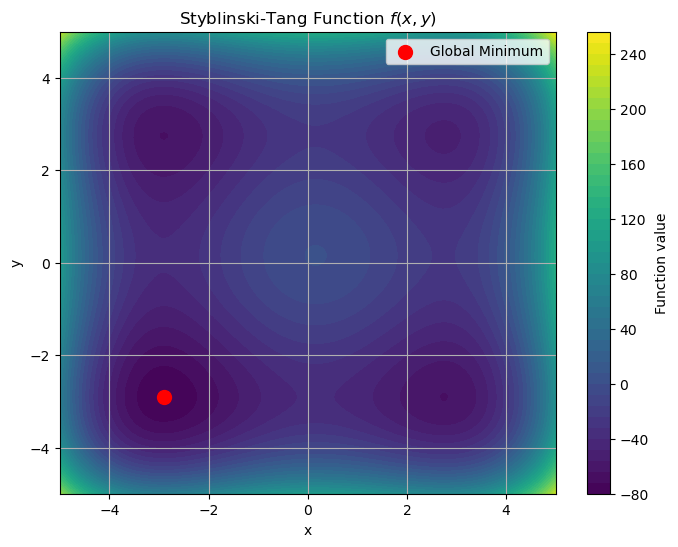

In [416]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Styblinski-Tang function
def styblinski_tang(x, y):
    return 0.5 * (x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y)

# Define the grid range as integers
x_vals = np.arange(-5, 5.1, 0.1)
y_vals = np.arange(-5, 5.1, 0.1)

# Create the grid for x, y values based on the defined range 
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate function values on the grid 
Z = styblinski_tang(X, Y)

# Find the global minimum
x_min = -2.903534
y_min = -2.903534
f_min = styblinski_tang(x_min, y_min)
print(f"Global minimum at x = {x_min:.6f}, y = {y_min:.6f}, f(x, y) = {f_min:.6f}")

# Plot the function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function value')

# Mark the global minimum point
plt.scatter(x_min, y_min, color='red', label='Global Minimum', s=100)

# Add labels and title
plt.title('Styblinski-Tang Function $f(x, y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

In [417]:
import numpy as np
from collections import Counter

class Metrics:
    def __init__(self):
        self.known_opt = None  # Known optimum value
        self.visited_points = []  # List of all visited points
        self.objective_values = []  # Objective values at visited points
        self.function_value_changes = []  # Change in function values between moves
        self.distance_between_solutions = []  # Distance between consecutive solutions
        self.number_of_accepted_moves = None  # Count of accepted moves
        self.number_of_rejected_moves = None  # Count of rejected moves
        self.best_iteration = None  # Iteration at which the best solution was found
        self.total_iterations = None
        self.num_regions = None
        self.distinct_points_visited = None  # Number of distinct points visited
        self.exploration_exploitation_ratio = None  # Exploration/Exploitation Ratio
        self.num_regions = 10  # Default number of regions

        self.H_x_deviation_from_optimum = []  # H_x deviation from the known optimum
        self.standard_deviation_from_optimum = None  # Standard deviation from the optimum
        self.convergence_rate = [] # convergence_rate
        self.absolute_convergence = None  # Absolute convergence
        self.logarithmic_convergence = None  # Logarithmic convergence
        self.relative_error = []  # Relative Absolute Error
        self.geometric_convergence_rate = []  # Geometric convergence rate
        self.average_convergence_percentage = None  # Average convergence percentage
        self.convergence_relation = None  # Convergence relation metric
        
        self.general_diversity_measure = None  # General diversity metric
        self.entropy_over_time = []  # Array to store E(t) at each iteration
        

    def set_optimum(self, optimum):
        self.known_opt = optimum
    
    #adds a visited point to the visited point list
    #updates the distinct points visited 
    def add_visited_point(self, point):
        self.visited_points.append(point)
        self.distinct_points_visited = len(set(map(tuple, self.visited_points)))

    #records the objective values
    #deterimines the iteration where the last best objective function value was found at
    def add_objective_value(self, val):
        self.objective_values.append(val)
        # Ensure self.best_iteration is initialized
        if len(self.objective_values) == 1:  # First value
            self.best_iteration = 0
        elif val < self.objective_values[self.best_iteration]:
            self.best_iteration = len(self.objective_values) - 1

    def calculate_function_value_change(self):
        self.function_value_changes = [
            self.objective_values[i + 1] - self.objective_values[i]
            for i in range(len(self.objective_values) - 1)
        ]

    def calculate_distance_between_solutions(self):
        self.distance_between_solutions = [
            np.linalg.norm(np.array(self.visited_points[i + 1]) - np.array(self.visited_points[i]))
            for i in range(len(self.visited_points) - 1)
        ]

    def calculate_H_x_deviation_metric(self):
        """
        Calculate the performance metric H_x(i) for all objective values.
        Formula: H_x(i) = |OPT(i) - A_x(i)| / OPT(i)
        Special case: If OPT(i) = 0, use the absolute deviation |A_x(i)|.
        """
        if self.known_opt is None:
            raise ValueError("Known optimum is not set.")
        
        if self.known_opt == 0:
            # Special case when OPT(i) = 0 to avoid division by zero
            self.H_x_deviation_from_optimum = [abs(val) for val in self.objective_values]
        else:
            # General case
            self.H_x_deviation_from_optimum = [
                abs(self.known_opt - val) / abs(self.known_opt)
                for val in self.objective_values
            ]

    def calculate_standard_deviation_from_optimum(self):
        if not self.H_x_deviation_from_optimum:
            self.calculate_H_x_deviation_metric()
        self.standard_deviation_from_optimum = np.std(self.H_x_deviation_from_optimum)

    def calculate_convergence_rate(self):
        """
        Calculate the convergence rate for the objective values.
        Formula: Conv.rate = |f_opt - f_{i+1}| / |f_opt - f_i|
        """
        if self.known_opt is None:
            raise ValueError("Known optimum is not set.")
        if len(self.objective_values) < 2:
            raise ValueError("Not enough objective values to calculate convergence rate.")
        
        # Initialize convergence rate list
        self.convergence_rate = []
        
        # Calculate convergence rate for each pair of consecutive values
        for i in range(len(self.objective_values) - 1):
            current_diff = abs(self.known_opt - self.objective_values[i])
            next_diff = abs(self.known_opt - self.objective_values[i + 1])
            
            # Handle division by zero
            if current_diff == 0:
                self.convergence_rate.append(float('inf'))
            else:
                self.convergence_rate.append(next_diff / current_diff)
   
    #does same thing as function value changes
    def calculate_absolute_convergence(self):
        """
        Calculate the absolute convergence as |f_i - f_opt| for all objective values.
        """
        if self.known_opt is None:
            raise ValueError("Known optimum is not set.")
        
        # Calculate absolute convergence for each objective value
        self.absolute_convergence = [abs(f_i - self.known_opt) for f_i in self.objective_values]

    def calculate_logarithmic_convergence(self):
        if self.known_opt is None:
            raise ValueError("Known optimum is not set.")
        self.logarithmic_convergence = [
            np.log(abs(val - self.known_opt)) if val != self.known_opt else float('-inf')
            for val in self.objective_values
        ]


    # def calculate_relative_error(self):
    #     """
    #     Calculate the relative error (E(i)) for the objective values.
    #     Formula: E(i) = 1 - (F_i / f_opt)
    #     Handles cases where f_opt = 0 by skipping the calculation or assigning a placeholder value.
    #     """
    #     if self.known_opt is None:
    #         raise ValueError("Known optimum is not set.")
    #     if len(self.objective_values) == 0:
    #         raise ValueError("No objective values to calculate relative error.")
    
    #     self.relative_error = []
    
    #     for f_i in self.objective_values:
    #         if self.known_opt == 0:
    #             # Placeholder: Uncomment the line below to handle f_opt = 0 if needed
    #             # self.relative_error.append(abs(f_i))
    #             self.relative_error.append(float('nan'))  # Assign NaN or skip this value
    #         else:
    #             # General formula
    #             self.relative_error.append(1 - (f_i / self.known_opt))


    def calculate_geometric_convergence_rate(self):
        """
        Calculate the geometric convergence rate (R(i)) for the objective values.
        Formula: R(i) = 1 - (|f_opt - f_i| / |f_opt - f_0|)^(1 / i)
        """
        if self.known_opt is None:
            raise ValueError("Known optimum is not set.")
        if len(self.objective_values) < 2:
            raise ValueError("At least two objective values are required to calculate geometric convergence.")
    
        # Initialize geometric convergence rate list
        self.geometric_convergence_rate = []
    
        # First objective value (f_0)
        initial_diff = abs(self.known_opt - self.objective_values[0])
    
        # Calculate R(i) for each iteration
        for i in range(1, len(self.objective_values)):
            current_diff = abs(self.known_opt - self.objective_values[i])
    
            if initial_diff == 0:
                # Handle division by zero: if the initial difference is 0
                self.geometric_convergence_rate.append(1.0 if current_diff == 0 else 0.0)
            else:
                # General formula
                self.geometric_convergence_rate.append(1 - (current_diff / initial_diff) ** (1 / i))



    # def calculate_average_convergence_percentage(self):
    #     """
    #     Calculate the average convergence percentage.
    #     Formula: (1 - ((avg(f_x) - f_opt) / f_opt)) * 100
    #     Special case: If f_opt = 0, handle division by zero.
    #     """
    #     if self.known_opt is None:
    #         raise ValueError("Known optimum is not set.")
        
    #     if len(self.objective_values) == 0:
    #         raise ValueError("Objective values are not available.")
        
    #     # Calculate the average objective value
    #     avg_f_x = np.mean(self.objective_values)
        
    #     if self.known_opt == 0:
    #         # Handle case where f_opt is 0
    #         self.average_convergence_percentage = float('inf')  # Assign infinity or an alternate value
    #     else:
    #         # General formula
    #         self.average_convergence_percentage = (
    #             1 - ((avg_f_x - self.known_opt) / self.known_opt)
    #         ) * 100

    def calculate_convergence_relation(self):
        """
        Calculate the convergence relation metric.
        Formula: C_relation = C_G / T_G
        where:
            C_G = Best iteration (self.best_iteration)
            T_G = Total number of iterations (self.total_iterations)
        """
        if self.total_iterations == 0:
            raise ValueError("Total iterations cannot be zero.")
        
        self.convergence_relation = self.best_iteration / self.total_iterations

    
    def calculate_general_diversity(self):
        """
        Calculate the general diversity measure as the average dimension-wise variance.
        Adapted for Simulated Annealing.
        """
        if len(self.visited_points) > 1:
            dimension_count = len(self.visited_points[0])  # Number of dimensions
            diversity_per_dimension = [
                np.var([point[dim] for point in self.visited_points]) for dim in range(dimension_count)
            ]
            self.general_diversity_measure = np.mean(diversity_per_dimension)

    def calculate_population_entropy_over_time(self):
        """
        Calculates population entropy diversity at each iteration.
        """
        if len(self.visited_points) < 2:
            self.entropy_over_time.append(0)  # No entropy if fewer than 2 points
            return
    
        visited_points = np.array(self.visited_points)
        min_bounds = np.min(visited_points, axis=0)
        max_bounds = np.max(visited_points, axis=0)
        bins = [
            np.linspace(min_bounds[dim], max_bounds[dim], self.num_regions + 1)
            for dim in range(visited_points.shape[1])
        ]
        
        # Calculate entropy for the current state only
        region_counts, _ = np.histogramdd(visited_points, bins=bins)
        region_counts = region_counts.flatten()
        total_visits = np.sum(region_counts)
        if total_visits == 0:
            self.entropy_over_time.append(0)
        else:
            probabilities = region_counts / total_visits
            entropy_t = -np.sum(probabilities[probabilities > 0] * np.log(probabilities[probabilities > 0]))
            self.entropy_over_time.append(entropy_t)

    def calculate_exploration_exploitation_ratio(self):
        self.exploration_exploitation_ratio = self.distinct_points_visited / self.number_of_accepted_moves \
            if self.number_of_accepted_moves > 0 else float('inf')


    def print_metrics(self):
        self.calculate_function_value_change()
        self.calculate_distance_between_solutions()
        self.calculate_H_x_deviation_metric()
        self.calculate_standard_deviation_from_optimum()
        self.calculate_convergence_rate()
        self.calculate_absolute_convergence()
        self.calculate_logarithmic_convergence()
        #self.calculate_average_convergence_percentage()
        self.calculate_geometric_convergence_rate()
        self.calculate_convergence_relation()
        self.calculate_exploration_exploitation_ratio()
        self.calculate_general_diversity()
        self.calculate_population_entropy_over_time()

        
        print("--- Base METRICS ---")
        print("Visited Points:", self.visited_points)
        print("Objective Values:", self.objective_values)
        #print("Function Value Changes:", self.function_value_changes)
        print("Distance Between Solutions:", self.distance_between_solutions)
        print("Number of Accepted Moves:", self.number_of_accepted_moves)
        print("Number of Rejected Moves:", self.number_of_rejected_moves)
        print("Best Iteration:", self.best_iteration)
        print("Distinct Points Visited:", self.distinct_points_visited)
        print("Exploration/Exploitation Ratio:", self.exploration_exploitation_ratio)


        print("--- calculated METRICS ---")        
        print("H_x_performance metrics From Optimum:", self.H_x_deviation_from_optimum)
        print("Standard Deviation From Optimum:", self.standard_deviation_from_optimum)
        print("Convergence Rate:", self.convergence_rate)
        # print("Relative Absolute Error (RAE):", self.relative_error)
        print("Absolute Convergence:", self.absolute_convergence)
        print("Logarithmic Convergence:", self.logarithmic_convergence)
        print("Geometric Convergence Rate:", self.geometric_convergence_rate)
        #print("Average Convergence Percentage:", self.average_convergence_percentage)
        print("Convergence Relation:", self.convergence_relation)
        print("General Diversity Measure:", self.general_diversity_measure)
        print("Population Entropy Diversity:", self.entropy_over_time)

In [418]:
# def hill_climbing(func, x_vals, y_vals, max_iters=100):
#     metrics = Metrics()
    
#     # Initialize solution
#     x, y = random.choice(x_vals), random.choice(y_vals)
#     best_solution = (x, y)
#     best_value = func(x, y)
    
#     # Set known optimum for metrics
#     metrics.set_optimum(-78.332331)  # Rastrigin's global optimum is 0
#     metrics.add_visited_point((x, y))
#     metrics.add_objective_value(best_value)
#     metrics.number_of_accepted_moves = 0
#     metrics.number_of_rejected_moves = 0
    
#     for iteration in range(max_iters):
#         # Generate all neighboring points
#         neighbors = [
#             (x + dx, y + dy)
#             for dx in [-1, 0, 1]
#             for dy in [-1, 0, 1]
#             if (dx != 0 or dy != 0) and (x + dx in x_vals) and (y + dy in y_vals)
#         ]
        
#         # Evaluate neighbors
#         neighbor_values = [func(nx, ny) for nx, ny in neighbors]
        
#         # Find the best neighbor
#         min_value = min(neighbor_values)
#         min_index = neighbor_values.index(min_value)
#         x_prime, y_prime = neighbors[min_index]
        
#         # Record metrics
#         metrics.function_value_changes.append(min_value - best_value)
        
#         # Move if the neighbor is better
#         if min_value < best_value:
#             x, y = x_prime, y_prime
#             best_solution = (x, y)
#             best_value = min_value
#             metrics.add_visited_point((x, y))
#             metrics.add_objective_value(best_value)
#             metrics.number_of_accepted_moves += 1
#         else:
#             metrics.number_of_rejected_moves += 1
        
#         # Calculate entropy for this iteration
#         metrics.calculate_population_entropy_over_time()
    
#     # Finalize metrics
#     metrics.total_iterations = max_iters
#     metrics.num_regions = 10
#     metrics.calculate_function_value_change()
#     metrics.calculate_distance_between_solutions()
#     metrics.calculate_H_x_deviation_metric()
#     metrics.calculate_standard_deviation_from_optimum()
#     metrics.calculate_convergence_rate()
#     metrics.calculate_absolute_convergence()
#     metrics.calculate_logarithmic_convergence()
#     metrics.calculate_geometric_convergence_rate()
#     metrics.calculate_convergence_relation()
#     metrics.calculate_general_diversity()
#     metrics.calculate_exploration_exploitation_ratio()
    
#     return best_solution, metrics

In [421]:
def simulated_annealing(func, x_vals, y_vals, max_iters=100, initial_temp=1000, cooling_rate=0.005, no_improvement_limit=50):
    metrics = Metrics()
    metrics.set_optimum(-78.332331)

    # Initialize solution at a random point
    x, y = random.choice(x_vals), random.choice(y_vals)
    current_solution = (x, y)
    current_value = func(x, y)

    best_solution = current_solution
    best_value = current_value

    metrics.add_visited_point(current_solution)
    metrics.add_objective_value(current_value)

    metrics.number_of_accepted_moves = 0
    metrics.number_of_rejected_moves = 0

    # Lundy-Mees cooling schedule parameters
    T = initial_temp
    c = cooling_rate

    # Initialize variables for random restart
    iterations_since_improvement = 0

    for iteration in range(1, max_iters + 1):
        # Temperature update using Lundy-Mees cooling schedule
        T = T / (1 + c * T)

        # Select a random neighbor
        neighbors = [
            (current_solution[0] + dx, current_solution[1] + dy)
            for dx in [-1, 0, 1]
            for dy in [-1, 0, 1]
            if (dx != 0 or dy != 0)
            and (current_solution[0] + dx in x_vals)
            and (current_solution[1] + dy in y_vals)
        ]

        if not neighbors:
            continue  # Skip to next iteration if no neighbors

        x_prime, y_prime = random.choice(neighbors)
        candidate_solution = (x_prime, y_prime)
        candidate_value = func(x_prime, y_prime)

        # Calculate change in objective function
        delta_E = candidate_value - current_value
        metrics.function_value_changes.append(delta_E)

        # Accept or reject the new solution
        if delta_E < 0:
            # Accept the better solution
            current_solution = candidate_solution
            current_value = candidate_value
            metrics.number_of_accepted_moves += 1

            # Reset the iterations since last improvement
            iterations_since_improvement = 0

            # Update best solution found so far
            if current_value < best_value:
                best_solution = current_solution
                best_value = current_value

        else:
            # Accept with a probability based on the temperature
            acceptance_probability = np.exp(-delta_E / T)
            if random.uniform(0, 1) < acceptance_probability:
                current_solution = candidate_solution
                current_value = candidate_value
                metrics.number_of_accepted_moves += 1
            else:
                metrics.number_of_rejected_moves += 1

            # Increment the iterations since last improvement
            iterations_since_improvement += 1

        # Check if random restart is needed
        if iterations_since_improvement >= no_improvement_limit:
            # Perform random restart
            x, y = random.choice(x_vals), random.choice(y_vals)
            current_solution = (x, y)
            current_value = func(x, y)
            iterations_since_improvement = 0  # Reset counter

        # Record metrics
        metrics.add_visited_point(current_solution)
        metrics.add_objective_value(current_value)

        # Calculate entropy for this iteration
        metrics.calculate_population_entropy_over_time()

    # Finalize metrics
    metrics.total_iterations = max_iters
    metrics.num_regions = 10
    metrics.calculate_function_value_change()
    metrics.calculate_distance_between_solutions()
    metrics.calculate_H_x_deviation_metric()
    metrics.calculate_standard_deviation_from_optimum()
    metrics.calculate_convergence_rate()
    metrics.calculate_absolute_convergence()
    metrics.calculate_logarithmic_convergence()
    metrics.calculate_geometric_convergence_rate()
    metrics.calculate_convergence_relation()
    metrics.calculate_general_diversity()
    metrics.calculate_exploration_exploitation_ratio()

    return best_solution, metrics

In [422]:
# Example usage
best_solution, metrics = simulated_annealing(
    styblinski_tang,
    x_vals,
    y_vals,
    max_iters=1000,
    initial_temp=1000,
    cooling_rate=0.005,
    no_improvement_limit=10  # Adjust this value as needed
)

print("Best solution found:", best_solution)
print("Best objective value:", rastrigin(*best_solution))
metrics.print_metrics()

ValueError: Not enough objective values to calculate convergence rate.

In [ ]:
# Code cell to generate the exact sequence

def generate_exact_sequence(metrics, x_vals, y_vals):
    """
    Generates the exact sequence for the search trajectory stored in the Metrics object.
    """
    sequence = []
    visited_positions = set()
    position_history = {}

    for i, current_solution in enumerate(metrics.visited_points):
        deviation = metrics.H_x_deviation_from_optimum[i]

        # Check for cycles (C)
        solution_tuple = tuple(current_solution)
        if solution_tuple in visited_positions:
            symbol = 'C'  # Cycle detected
            sequence.append(symbol)
            continue
        else:
            visited_positions.add(solution_tuple)

        # Evaluate all direct neighbors
        neighbors = [
            (current_solution[0] + dx, current_solution[1] + dy)
            for dx in [-1, 0, 1]
            for dy in [-1, 0, 1]
            if (dx != 0 or dy != 0)
            and (current_solution[0] + dx in x_vals)
            and (current_solution[1] + dy in y_vals)
        ]

        current_value = metrics.objective_values[i]

        better = False
        equal = False
        worse = False

        for neighbor in neighbors:
            neighbor_value = rastrigin(*neighbor)
            if neighbor_value < current_value:
                better = True
            elif neighbor_value == current_value:
                equal = True
            elif neighbor_value > current_value:
                worse = True

        # Determine position type based on better, equal, worse flags
        if better and not equal and not worse:
            position_type = 'S'  # Strict local minimum
        elif better and equal and not worse:
            position_type = 'M'  # Local minimum
        elif not better and equal and not worse:
            position_type = 'I'  # Interior plateau
        elif better and not equal and worse:
            position_type = 'P'  # Slope
        elif better and equal and worse:
            position_type = 'L'  # Ledge
        elif not better and equal and worse:
            position_type = 'X'  # Local maximum
        elif not better and not equal and worse:
            position_type = 'A'  # Strict local maximum
        else:
            position_type = 'U'  # Undefined (in case no flags are set)

        # Deviation is a float; convert it to an integer for the symbol
        deviation_int = int(round(deviation))

        # Combine deviation and position type into a symbol
        symbol = f"{deviation_int:02}{position_type}"
        sequence.append(symbol)

    return sequence

In [ ]:
# Generate the exact sequence
sequence = generate_exact_sequence(metrics, x_vals, y_vals)
print("Exact Sequence:")
print('-'.join(sequence))

In [ ]:
# Plot the visited points over the graph of the Rastrigin function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Function value')

# Plot the visited points
visited_points = np.array(metrics.visited_points)
plt.plot(visited_points[:, 0], visited_points[:, 1], marker='o', linestyle='-', color='red', label='Visited Points')

# Plot the global optimum
plt.scatter(0, 0, color='black', label='Global Optimum', s=100, zorder=3)  # Optimum point at (0, 0)

# Overlay the start point
plt.scatter(visited_points[0, 0], visited_points[0, 1], color='blue', label='Start Point', s=100, zorder=3)  # Start point

# Overlay the end point
plt.scatter(visited_points[-1, 0], visited_points[-1, 1], color='yellow', label='End Point', s=100, zorder=3)  # End point

plt.title("Visited Points on the Rastrigin Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Plot Geometric Convergence Rate
plt.figure(figsize=(8, 6))
plt.plot(metrics.geometric_convergence_rate, label="Geometric Convergence Rate", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Rate")
plt.title("Geometric Convergence Rate Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

# Plot Entropy Diversity Over Time
plt.figure(figsize=(8, 6))
plt.plot(metrics.entropy_over_time, label="Population Entropy Diversity", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Entropy")
plt.title("Population Entropy Diversity Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

# Plot Absolute Convergence
plt.figure(figsize=(8, 6))
plt.plot(metrics.absolute_convergence, label="Absolute Convergence", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Absolute Convergence")
plt.title("Absolute Convergence Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

# Plot Distance Between Solutions
plt.figure(figsize=(8, 6))
plt.plot(metrics.distance_between_solutions, label="Distance Between Solutions", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.title("Distance Between Solutions Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Number of runs
num_runs = 10  # Adjust the number of runs as needed

# List to store metrics from each run
runs_metrics = []

for run in range(num_runs):
    print(f"Running simulation {run + 1}/{num_runs}")
    best_solution, metrics = simulated_annealing(
        rastrigin,
        x_vals,
        y_vals,
        max_iters=1000,
        initial_temp=1000,
        cooling_rate=0.005,
        no_improvement_limit=10  # Adjust this value as needed
    )
    runs_metrics.append(metrics)

In [ ]:
import pandas as pd

# List to hold dictionaries of metrics for each run
data = []

for idx, metrics in enumerate(runs_metrics):
    run_data = {'Run': idx + 1}
    
    # Include all metrics as features, including arrays/lists
    run_data['known_opt'] = metrics.known_opt
    run_data['visited_points'] = metrics.visited_points
    run_data['objective_values'] = metrics.objective_values
    run_data['function_value_changes'] = metrics.function_value_changes
    run_data['distance_between_solutions'] = metrics.distance_between_solutions
    run_data['number_of_accepted_moves'] = metrics.number_of_accepted_moves
    run_data['number_of_rejected_moves'] = metrics.number_of_rejected_moves
    run_data['best_iteration'] = metrics.best_iteration
    run_data['total_iterations'] = metrics.total_iterations
    run_data['num_regions'] = metrics.num_regions
    run_data['distinct_points_visited'] = metrics.distinct_points_visited
    run_data['exploration_exploitation_ratio'] = metrics.exploration_exploitation_ratio
    run_data['H_x_deviation_from_optimum'] = metrics.H_x_deviation_from_optimum
    run_data['standard_deviation_from_optimum'] = metrics.standard_deviation_from_optimum
    run_data['convergence_rate'] = metrics.convergence_rate
    run_data['absolute_convergence'] = metrics.absolute_convergence
    run_data['logarithmic_convergence'] = metrics.logarithmic_convergence
    run_data['relative_error'] = metrics.relative_error
    run_data['geometric_convergence_rate'] = metrics.geometric_convergence_rate
    run_data['convergence_relation'] = metrics.convergence_relation
    run_data['general_diversity_measure'] = metrics.general_diversity_measure
    run_data['entropy_over_time'] = metrics.entropy_over_time
    
    data.append(run_data)

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)